In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
from scipy.optimize import minimize
import time
import os

## Gradient Descent:

Optimization: Ordinary Least Squares Vs. Gradient Descent — from scratch

### Gradient Descent

Consider 20 people(including yourself) are randomly air dropped in a mountain range. Your task is to find the highest peak in the complete range within 30 days. Each one of you has a walkie talkie to communicate and an altimeter to measure the altitude. Each day you all spend hours locating highest peak possible and report your highest altitude of the day to everyone else which they found in the area allotted to them — that is their fitness values.

Suppose on Day 1 you report 1000ft. , someone else reports 1230 ft. and so on. Then there is a person who reports 5000ft. which is the maximum of all. 

What do you do next on Day 2?Next day every one will gather towards the area where maximum altitude was found yesterday. They will think that it’s probable that the highest peak of the range would be in this area itself. Why would someone who reported 500ft yesterday once again search that area if there is another area which already has 5000ft. So all the searchers ‘greedily’ move towards the highest reported point. N

The guy that was at 500ft. yesterday could have been at the base of a peak which had a height of 10000ft.!  You actually get stuck in a Local Maxima/Optima.



<h1>Algorithms that use Gradient Descent:</h1>
    
* Scikit learn gradient descent
* Scikit learn gradient descent regression
* Scikit learn stochastic gradient descent classifier
* Scikit learn batch gradient descent
* Scikit learn minibatch gradient descent
* Scikit learn stochastic gradient descent regression
* Scikit learn logistic regression gradient descent
* Scikit learn gradient descent linear regression

<h1>Hyper Parameters for Gradient Descent</h1>

* Learning rate
* Starting point
* Number of iterations

# Objective Function
$f_1(x,y) = 2(x-20)^2 + 10(y+30)^2 + 10$


$f_2(x,y) = (x+10)^2 (y-2)^2 + (x-8)^2 (y+3)^2 + 10$


$f_3(x,y)=3(1-x)^2e^{-x^2-(y+1)^2}-10(\frac{x}5-x^3-y^5)e^{-x^2-y^2}-\frac13 e^{-(x+1)^2-y^2}$

In [17]:
def objFunc1(x, y):
    
    return 2*(x-20)**2 + 10*(y+30)**2 + 10

In [18]:
def objFunc2(x, y):
    
    return (x+10)**2 *(y-2)**2 + (x-8)**2 * (y+3)**2 + 10

In [19]:
def objFunc3(x, y):
    
    return 3*(1-x)**2*np.exp(-(x**2) - (y+1)**2) - 10*(x/5 - x**3 - y**5)*np.exp(-x**2-y**2) - 1/3*np.exp(-(x+1)**2 - y**2)

In [20]:
def gradF1(param):
    
    x = param[0]
    y = param[1]
    grad = np.array([4.0*(x-20),20.0*(y+30)])
    return grad

In [21]:
def gradF2(param):
    
    x = param[0]
    y = param[1]
    grad = np.array([2.0*(x+10) *(y-2)**2 + 2*(x-8) *(y+3)**2, 2.0*(y-2) * (x+10)**2 + 2*(y+3) * (x-8)**2 ])
    return grad

In [22]:
def gradF3(param):
    
    x = param[0]
    y = param[1]
    grad = np.array([(-6*(1-x)-6*x*(1-x)**2)*np.exp(-(x**2)-(y+1)**2) - 10*(1/5-3*x*x +(x/5 - x**3 - y**5)*(-2*x))*np.exp(-x**2-y**2) - 1/3*(-2*(x+1))*np.exp(-(x+1)**2-y**2),
                    -6*(1+y)*((1-x)**2)*np.exp(-(x**2)-(y+1)**2)-10*(-5*y**4+(x/5 - x**3 - y**5)*(-2*y))*np.exp(-x**2-y**2) - 1/3*(-2*y)*np.exp(-(x+1)**2-y**2)])
    return grad


$f_2(x,y) = (x+10)^2 (y-2)^2 + (x-8)^2 (y+3)^2 + 10$

In [23]:
x = np.linspace(-50,50, 100)
y = np.linspace(-50,50, 100)

X, Y = np.meshgrid(x,y)
Z =  objFunc2(X, Y)

# Surface Plot

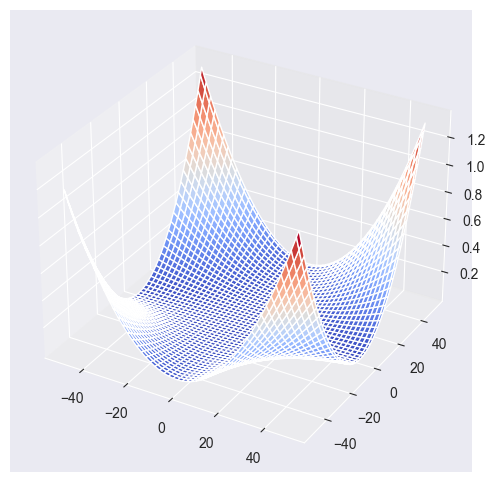

In [24]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm)

# Gradient Descent

In [25]:
whichStartingPoint = 4

# different starting points
if whichStartingPoint == 1:
    x0 = -100
    y0 = 250
elif whichStartingPoint == 2:
    x0 = 100
    y0 = 100
elif whichStartingPoint == 3:
    x0 = -250
    y0 = 300
elif whichStartingPoint == 4:
    x0 = -20
    y0 = 20
else:
    x0 = -100.0
    y0 = -300.0
    


param0 = np.array([x0, y0])

# Gradient Descent
nIters = 500
g1 = 0.001 #learning rate
x_i = param0
xs = np.zeros(nIters+1)
ys = np.zeros(nIters+1)
xs[0] = x0
ys[0] = y0

for i in np.arange(nIters):
    delF = gradF2(x_i)
    x_i = x_i - g1*delF
    xs[i+1] = x_i[0]
    ys[i+1] = x_i[1]

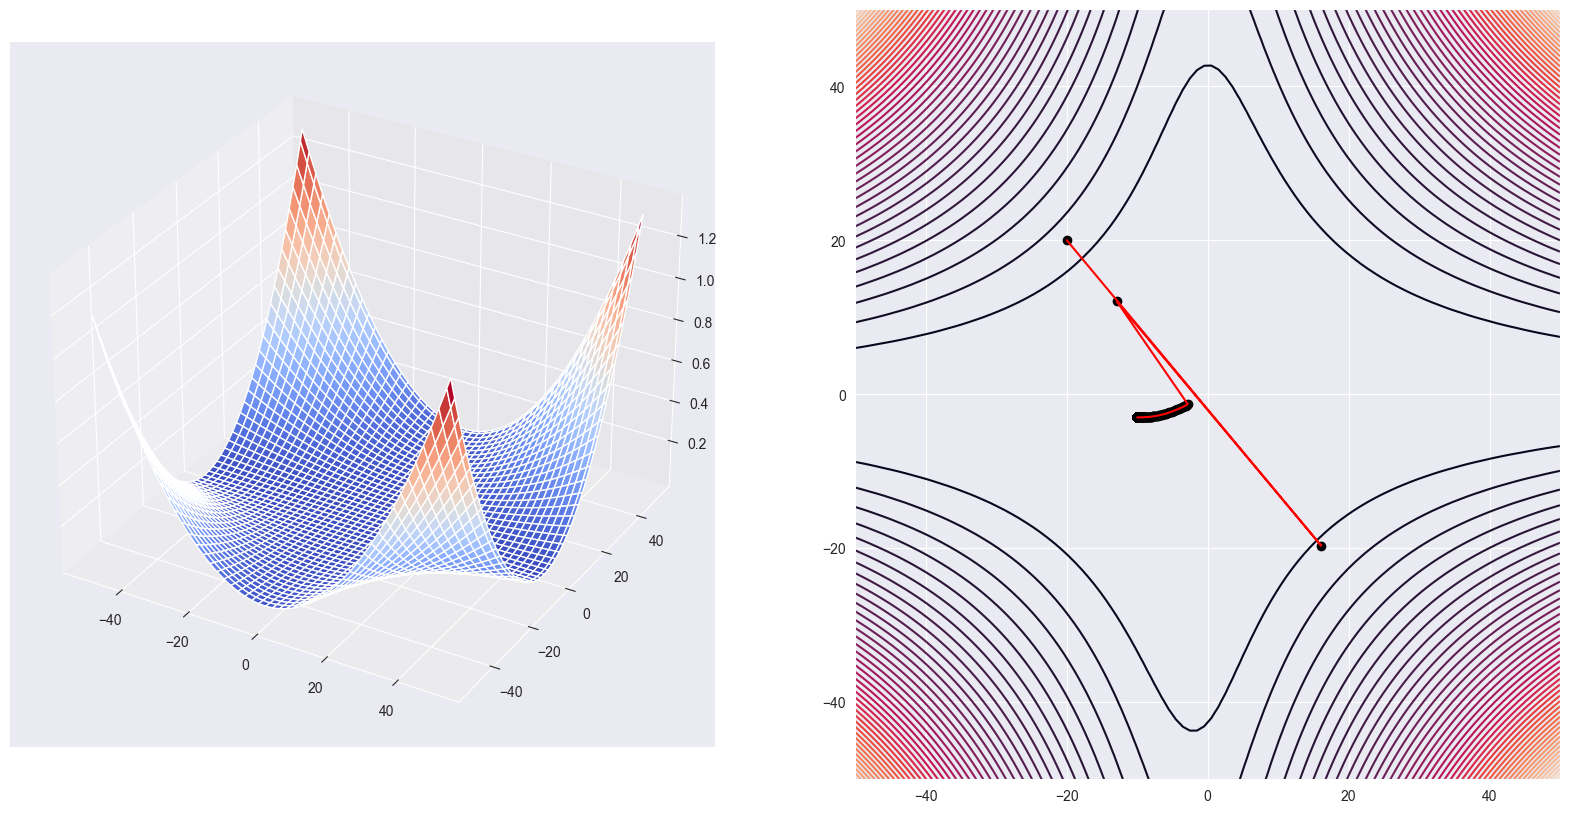

In [26]:
# Plot the trajectory
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm)
ax2 = fig.add_subplot(122)
ax2.contour(X, Y, Z, 50)
ax2.plot(xs, ys, color='r')
ax2.scatter(xs, ys, color='k')

<h1>More complex surfaces can have muliple minima</h1>

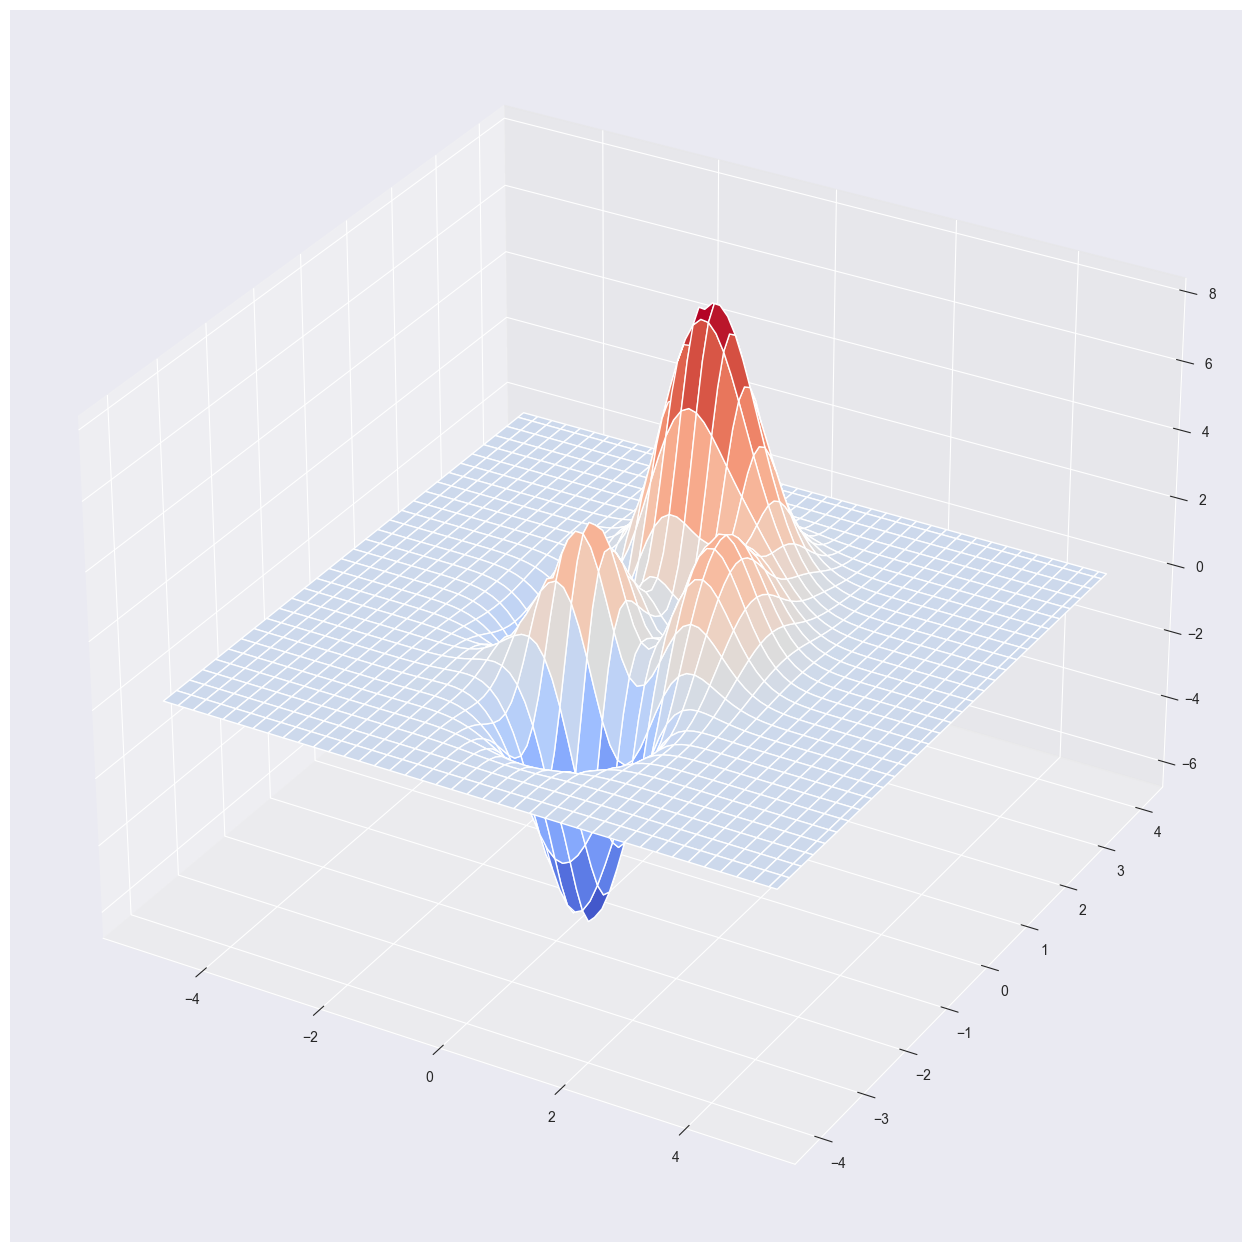

In [27]:
x = np.linspace(-5,5, 80)
y = np.linspace(-4,4, 60)
X, Y = np.meshgrid(x,y)
Z =  objFunc3(X, Y)

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm)

In [31]:
whichStartingPoint = 4

# different starting points
if whichStartingPoint == 1:
    x0 = -1.0
    y0 = 2.5
elif whichStartingPoint == 2:
    x0 = 1.0
    y0 = 1.0
elif whichStartingPoint == 3:
    x0 = -2.5
    y0 = 0.5
else:
    x0 = -1.0
    y0 = -3.0

param0 = np.array([x0, y0])

In [36]:
# Gradient Descent
nIters = 5000
g1 = 0.01 #learning rate
x_i = param0
xs = np.zeros(nIters+1)
ys = np.zeros(nIters+1)
xs[0] = x0
ys[0] = y0

for i in np.arange(nIters):
    delF = gradF3(x_i)
    x_i = x_i - g1*delF
    xs[i+1] = x_i[0]
    ys[i+1] = x_i[1]

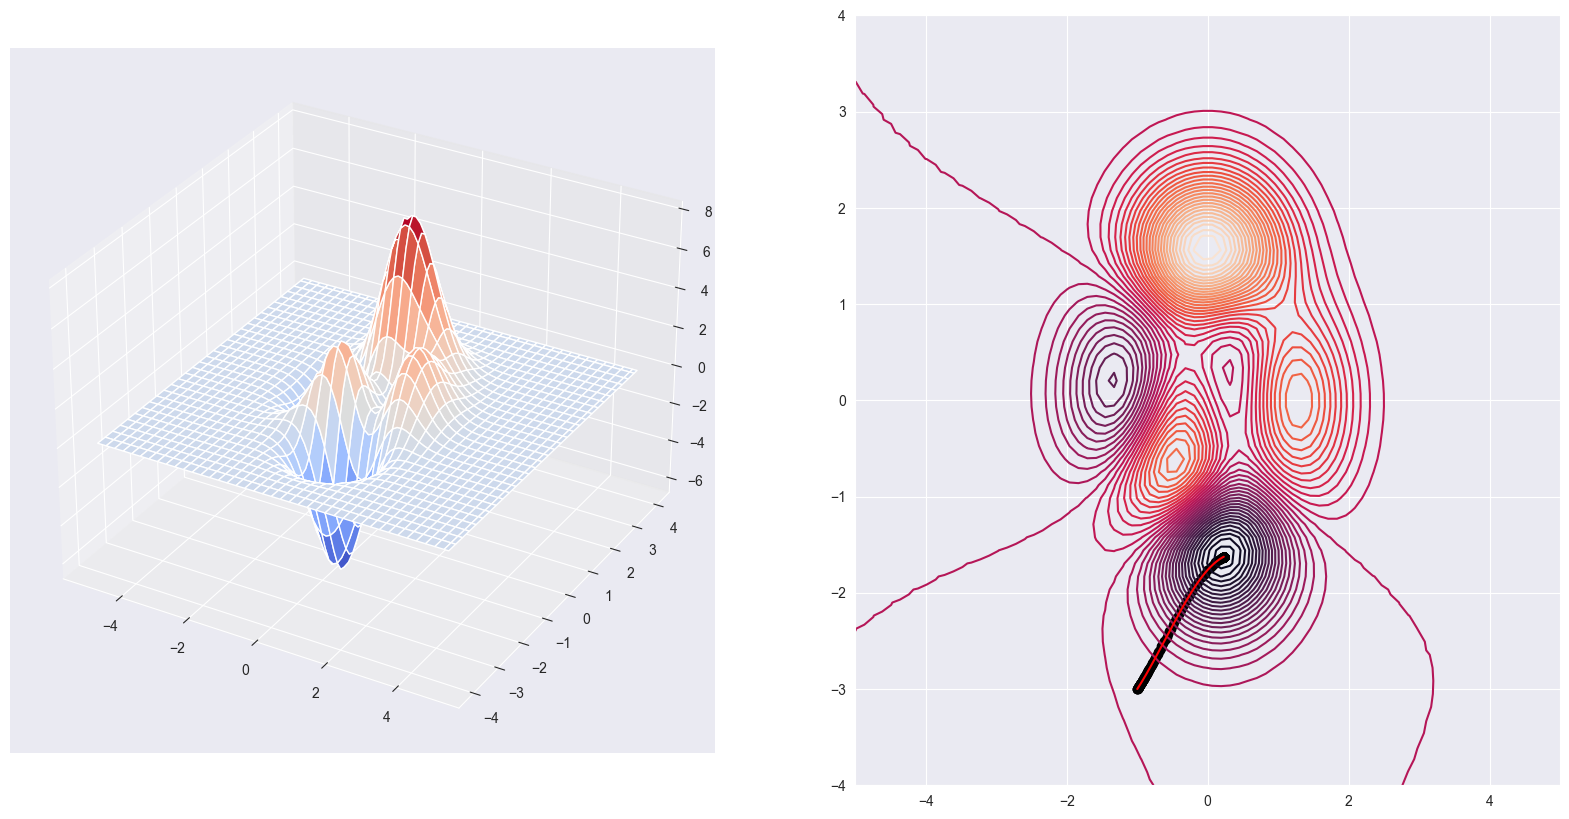

In [37]:
# Plot the trajectory
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm)
ax2 = fig.add_subplot(122)
ax2.contour(X,Y,Z,50)
ax2.plot(xs, ys,color='r')
ax2.scatter(xs,ys,color='k')